# 주식 데이터 분석

In [24]:
import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib as mpl 
import matplotlib.pyplot as plt 
%matplotlib inline
# 한글폰트 사용
mpl.rc('font', family='Malgun Gothic')
mpl.rc('axes', unicode_minus=False)

In [26]:
import warnings
warnings.filterwarnings("ignore")

In [28]:
from fbprophet import Prophet
from datetime import datetime
import pandas_datareader as pdr

### 기아자동차 주식

In [30]:
start = datetime(2013, 1, 1)
end = datetime(2020, 12, 4)
kia = pdr.DataReader('000270.KS', data_source='yahoo', start=start, end=end)
kia.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2013-01-02,57400.0,56000.0,57000.0,56300.0,2145047.0,56300.0
2013-01-03,56700.0,54100.0,56300.0,54600.0,4392999.0,54600.0
2013-01-04,54600.0,52700.0,54300.0,53600.0,3916692.0,53600.0
2013-01-07,54500.0,53600.0,53800.0,54000.0,2061988.0,54000.0
2013-01-08,54800.0,53700.0,53700.0,54500.0,1899832.0,54500.0


In [32]:
kia.tail()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2020-11-30,60400.0,57800.0,58700.0,57800.0,3810442.0,57800.0
2020-12-01,60000.0,58100.0,58700.0,59800.0,1822248.0,59800.0
2020-12-02,61000.0,59400.0,60000.0,60800.0,2964672.0,60800.0
2020-12-03,64800.0,60000.0,60800.0,64700.0,4152306.0,64700.0
2020-12-04,66600.0,64300.0,65000.0,65400.0,3866516.0,65400.0


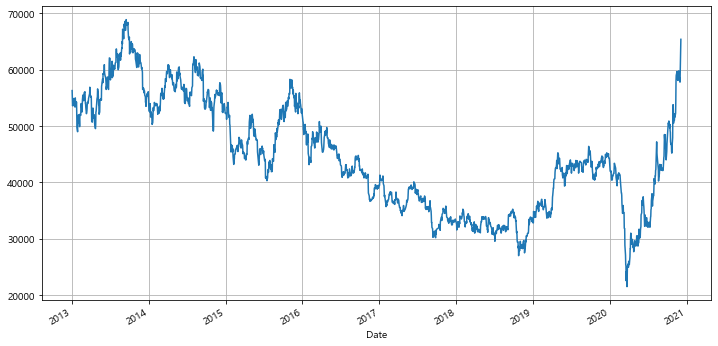

In [34]:
kia.Close.plot(figsize=(12,6), grid=True)
plt.show()

In [35]:
kia_trunc = kia[:'2020-06-30']
kia_trunc.tail()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2020-06-24,34450.0,32550.0,32700.0,33750.0,2345625.0,33750.0
2020-06-25,33200.0,32500.0,33050.0,32550.0,1495320.0,32550.0
2020-06-26,33500.0,32850.0,33100.0,33050.0,1329381.0,33050.0
2020-06-29,32500.0,31900.0,32300.0,32100.0,1259626.0,32100.0
2020-06-30,32650.0,32050.0,32600.0,32050.0,1193847.0,32050.0


In [36]:
df = pd.DataFrame({'ds': kia_trunc.index, 'y': kia_trunc.Close})
df.reset_index(inplace=True)
del df['Date']
df.head()

,ds,y
0,2013-01-02,56300.0
1,2013-01-03,54600.0
2,2013-01-04,53600.0
3,2013-01-07,54000.0
4,2013-01-08,54500.0


In [37]:
model = Prophet(daily_seasonality=True)
model.fit(df)

In [38]:
future = model.make_future_dataframe(periods=157)
future.tail()

,ds
1988,2020-11-30
1989,2020-12-01
1990,2020-12-02
1991,2020-12-03
1992,2020-12-04


In [39]:
forecast = model.predict(future)

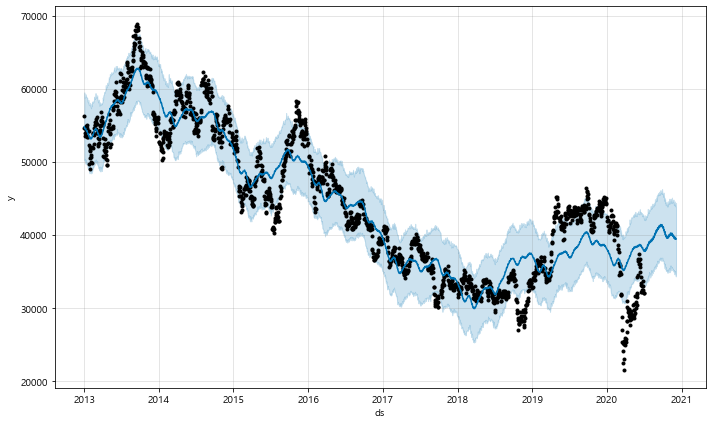

In [40]:
model.plot(forecast);

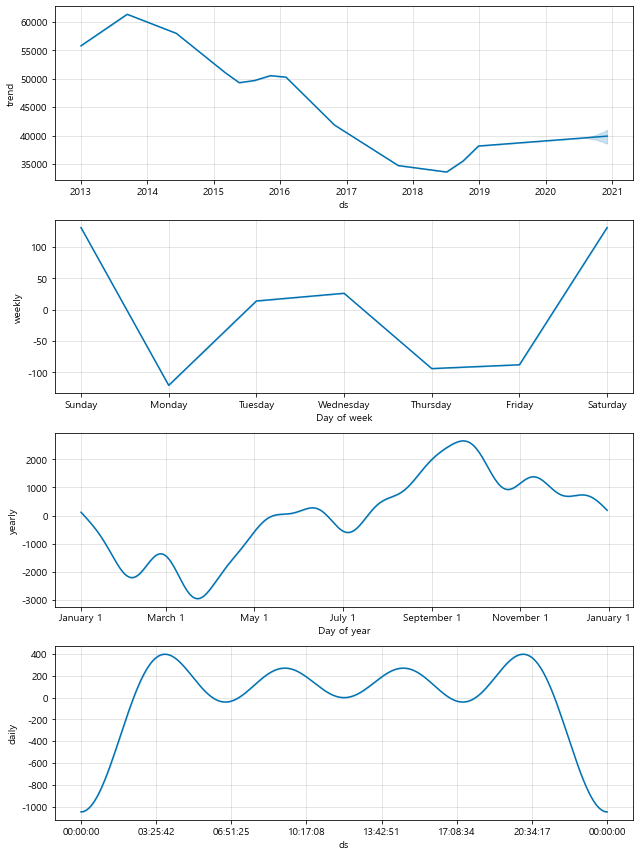

In [41]:
model.plot_components(forecast);

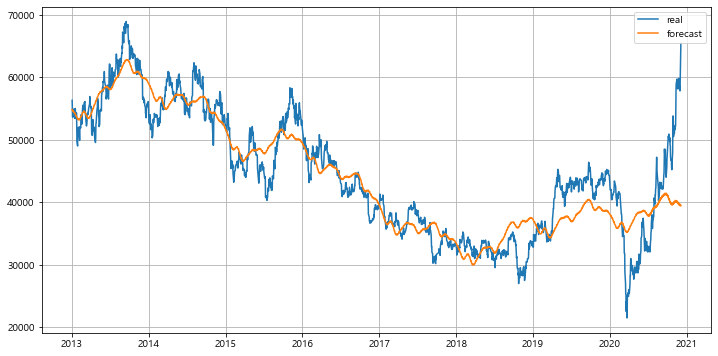

In [42]:
plt.figure(figsize=(12,6))
plt.plot(kia.index, kia.Close, label='real')
plt.plot(forecast.ds, forecast.yhat, label='forecast')
plt.grid()
plt.legend()
plt.show()